#https://towardsdatascience.com/financial-data-from-yahoo-finance-with-python-b5399743bcc6 
import sys
!{sys.executable} -m pip install yfinance


In [25]:
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn

In [26]:
# SP500 complete
start=datetime.datetime(1992, 1, 2)
end=datetime.datetime(2013, 1, 1)

#end=datetime.datetime(2013, 1, 1)
SP500 = yf.Ticker("^GSPC")
SP500 = SP500.history(start = start, end = end, period = "1d", prepost=False)


In [27]:
print(SP500.index)

DatetimeIndex(['1992-01-02', '1992-01-03', '1992-01-06', '1992-01-07',
               '1992-01-08', '1992-01-09', '1992-01-10', '1992-01-13',
               '1992-01-14', '1992-01-15',
               ...
               '2012-12-17', '2012-12-18', '2012-12-19', '2012-12-20',
               '2012-12-21', '2012-12-24', '2012-12-26', '2012-12-27',
               '2012-12-28', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=5291, freq=None)


In [28]:
print(len(SP500.index)*0.995)

5264.545


In [29]:
# Get Sector Data from Wikipedia
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df = first_table
#show unique economy sectors
sectors = df['GICS Sector'].values.tolist()
sectors = set(sectors)

In [30]:
print(sectors)

{'Real Estate', 'Energy', 'Information Technology', 'Consumer Staples', 'Industrials', 'Health Care', 'Materials', 'Consumer Discretionary', 'Communication Services', 'Utilities', 'Financials'}


In [31]:
NumberOfCompanies = 0

#### Fill almost complete Time Series

If a Time Series is not complete, but has more than 99.5% of the data: just interpolate the missing values by setting them equal to the previous value.

In [32]:
SPmissing =  yf.Ticker("^GSPC").history(start = start, end = end, period = "1d", prepost=False)


In [33]:
SPmissing = SPmissing.drop(SPmissing.index[99])
SPmissing =  SPmissing.drop(SPmissing.index[99])
SPmissing =  SPmissing.drop(SPmissing.index[1000])
SPmissing =  SPmissing.drop(SPmissing.index[5000])
print(SPmissing.index)

DatetimeIndex(['1992-01-02', '1992-01-03', '1992-01-06', '1992-01-07',
               '1992-01-08', '1992-01-09', '1992-01-10', '1992-01-13',
               '1992-01-14', '1992-01-15',
               ...
               '2012-12-17', '2012-12-18', '2012-12-19', '2012-12-20',
               '2012-12-21', '2012-12-24', '2012-12-26', '2012-12-27',
               '2012-12-28', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=5287, freq=None)


In [34]:
Missing = list(set(SP500.index) - set(SPmissing.index))
Missing = sorted(Missing)
print(Missing)

[Timestamp('1992-05-22 00:00:00'), Timestamp('1992-05-26 00:00:00'), Timestamp('1995-12-18 00:00:00'), Timestamp('2011-11-07 00:00:00')]


In [35]:
print(SPmissing)

                   Open         High          Low        Close      Volume  \
Date                                                                         
1992-01-02   417.029999   417.269989   411.040009   417.260010   207570000   
1992-01-03   417.269989   419.790009   416.160004   419.339996   224270000   
1992-01-06   419.309998   419.440002   416.920013   417.959991   251210000   
1992-01-07   417.959991   417.959991   415.200012   417.399994   252780000   
1992-01-08   417.359985   420.230011   415.019989   418.100006   290750000   
...                 ...          ...          ...          ...         ...   
2012-12-24  1430.150024  1430.150024  1424.660034  1426.660034  1248960000   
2012-12-26  1426.660034  1429.420044  1416.430054  1419.829956  2285030000   
2012-12-27  1419.829956  1422.800049  1401.800049  1418.099976  2830180000   
2012-12-28  1418.099976  1418.099976  1401.579956  1402.430054  2426680000   
2012-12-31  1402.430054  1426.739990  1398.109985  1426.189941  

In [36]:
for i in Missing:
    print(i)
    print(SP500.loc[i])
    SPmissing.loc[i] = np.nan 
SPmissing = SPmissing.sort_index()
print(SPmissing)

1992-05-22 00:00:00
Open            4.126100e+02
High            4.148200e+02
Low             4.126000e+02
Close           4.140200e+02
Volume          1.467100e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 1992-05-22 00:00:00, dtype: float64
1992-05-26 00:00:00
Open            4.140200e+02
High            4.140200e+02
Low             4.102300e+02
Close           4.114100e+02
Volume          1.977000e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 1992-05-26 00:00:00, dtype: float64
1995-12-18 00:00:00
Open            6.163400e+02
High            6.163400e+02
Low             6.061300e+02
Close           6.068100e+02
Volume          4.262700e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 1995-12-18 00:00:00, dtype: float64
2011-11-07 00:00:00
Open            1.253210e+03
High            1.261700e+03
Low             1.240750e+03
Close           1.261120e+03
Volume          3.429740e+09
Dividends       0.000000e+00
Stock Split

In [37]:
print(SPmissing.iloc[[99,100,1002,5003]])

            Open  High  Low  Close  Volume  Dividends  Stock Splits
Date                                                               
1992-05-22   NaN   NaN  NaN    NaN     NaN        NaN           NaN
1992-05-26   NaN   NaN  NaN    NaN     NaN        NaN           NaN
1995-12-18   NaN   NaN  NaN    NaN     NaN        NaN           NaN
2011-11-07   NaN   NaN  NaN    NaN     NaN        NaN           NaN


In [38]:
SPmissing["Close"].interpolate().iloc[[99,100,1002,5003]]

Date
1992-05-22     412.456675
1992-05-26     412.313344
1995-12-18     614.135010
2011-11-07    1264.575012
Name: Close, dtype: float64

In [39]:
print(SPmissing["Close"].iloc[95:105])

Date
1992-05-18    412.809998
1992-05-19    416.369995
1992-05-20    415.390015
1992-05-21    412.600006
1992-05-22           NaN
1992-05-26           NaN
1992-05-27    412.170013
1992-05-28    416.739990
1992-05-29    415.350006
1992-06-01    417.299988
Name: Close, dtype: float64


In [40]:
print(SPmissing["Close"].interpolate("nearest").iloc[95:105])

Date
1992-05-18    412.809998
1992-05-19    416.369995
1992-05-20    415.390015
1992-05-21    412.600006
1992-05-22    412.600006
1992-05-26    412.170013
1992-05-27    412.170013
1992-05-28    416.739990
1992-05-29    415.350006
1992-06-01    417.299988
Name: Close, dtype: float64


In [41]:
def Interpolate(DS, index):
    # takes pandas Series DS with some missing closing data and returns an interpolation for all
    # elements which are in index but not in DS.index
    Output = DS.copy()
    
    missing = set(index)-set(DS.index)
    
    for i in missing:
        Output.loc[i] = np.nan # add missing value
    Output = Output.sort_index() # sorting
    return(Output.interpolate("nearest"))

In [42]:
Interpolate(SPmissing["Close"], SP500.index)

Date
1992-01-02     417.260010
1992-01-03     419.339996
1992-01-06     417.959991
1992-01-07     417.399994
1992-01-08     418.100006
                 ...     
2012-12-24    1426.660034
2012-12-26    1419.829956
2012-12-27    1418.099976
2012-12-28    1402.430054
2012-12-31    1426.189941
Name: Close, Length: 5291, dtype: float64

In [43]:
CompaniesDF = pd.DataFrame({})
CompaniesDF.index = SP500.index
print(CompaniesDF)

Empty DataFrame
Columns: []
Index: [1992-01-02 00:00:00, 1992-01-03 00:00:00, 1992-01-06 00:00:00, 1992-01-07 00:00:00, 1992-01-08 00:00:00, 1992-01-09 00:00:00, 1992-01-10 00:00:00, 1992-01-13 00:00:00, 1992-01-14 00:00:00, 1992-01-15 00:00:00, 1992-01-16 00:00:00, 1992-01-17 00:00:00, 1992-01-20 00:00:00, 1992-01-21 00:00:00, 1992-01-22 00:00:00, 1992-01-23 00:00:00, 1992-01-24 00:00:00, 1992-01-27 00:00:00, 1992-01-28 00:00:00, 1992-01-29 00:00:00, 1992-01-30 00:00:00, 1992-01-31 00:00:00, 1992-02-03 00:00:00, 1992-02-04 00:00:00, 1992-02-05 00:00:00, 1992-02-06 00:00:00, 1992-02-07 00:00:00, 1992-02-10 00:00:00, 1992-02-11 00:00:00, 1992-02-12 00:00:00, 1992-02-13 00:00:00, 1992-02-14 00:00:00, 1992-02-18 00:00:00, 1992-02-19 00:00:00, 1992-02-20 00:00:00, 1992-02-21 00:00:00, 1992-02-24 00:00:00, 1992-02-25 00:00:00, 1992-02-26 00:00:00, 1992-02-27 00:00:00, 1992-02-28 00:00:00, 1992-03-02 00:00:00, 1992-03-03 00:00:00, 1992-03-04 00:00:00, 1992-03-05 00:00:00, 1992-03-06 00:00:00

In [44]:
def SectorNormReturns(sec,df, start, end, lag):
    global NumberOfCompanies
    # takes the name of a sector and returns the aggregated data of all companies' normalised returns from 
    # start to endhich have full data for this time period
    # Normalising via averages over lag
    #  df = pandas Dataframe of company symbols "Symbol" and sector "GICS Sector"
    
    Counter = 0 # how many "valid" time series?
    
    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series
    
    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector
    
    
    
    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end, period = "1d")
        StockData = StockData["Close"]
        print(sym,len(StockData.index), len(StockData.index) == len(SP500.index))
        
        
        # only add stocks to sector data which have full history
        if len(StockData.index) == len(SP500.index):
            
            Counter +=1
            
            
            # calculate returns via difference operator and an index shift
            StockShifted = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            StockShifted.index = StockData.index[1:(len(StockData))]
            StockData = (StockData.diff()/StockShifted) 
        
            # Shift the new data (again...) to calculate the average of the last "lag" returns before current date
            Shift = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            Shift.index = StockData.index[1:] 
            
            #print(sym)
            PlusOutput = (StockData-Shift.rolling(lag).mean())/Shift.rolling(lag).std()
            #print(PlusOutput)
            #print(sym, PlusOutput)

            Output = Output.add(PlusOutput)
            CompaniesDF[sym] = PlusOutput
            
        # if the data is incomplete, but almost complete    
        elif len(StockData.index) > 0.995*len(SP500.index): 
            
            # Interpolate the data
            StockData = Interpolate(StockData, SP500.index)
                        
            Counter +=1
            
            
            # calculate returns via difference operator and an index shift
            StockShifted = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            StockShifted.index = StockData.index[1:(len(StockData))]
            StockData = (StockData.diff()/StockShifted) 
        
            # Shift the new data (again...) to calculate the average of the last "lag" returns before current date
            Shift = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            Shift.index = StockData.index[1:] 
            
            #print(sym)
            PlusOutput = (StockData-Shift.rolling(lag).mean())/Shift.rolling(lag).std()
            #print(PlusOutput)
            #print(sym, PlusOutput)

            Output = Output.add(PlusOutput)
            CompaniesDF[sym] = PlusOutput
            
            
    NumberOfCompanies += Counter    
    print(Counter)   
    return(Output)

In [45]:
def NormSectorReturns(sec,df, start, end, lag):
    global NumberOfCompanies
    # takes the name of a sector and returns the aggregated data of all companies' normalised returns from
    # start to end which have full data for this time period
    # Normalising via averages over lag
    #  df = pandas Dataframe of company symbols "Symbol" and sector "GICS Sector"
    # DIFFERENCE TO ABOVE: FRIST add all of the sector's companies Time Series, then calculate the sector returns + normalise

    Counter = 0 # how many "valid" time series?

    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series

    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector



    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end, period = "1d")
        StockData = StockData["Close"]
        print(sym,len(StockData.index), len(StockData.index) > 0.995*len(SP500.index))


        # only add stocks to sector data which have full history
        if len(StockData.index) == len(SP500.index):

            Counter +=1
            Output =Output.add(StockData)

        # if the data is incomplete, but almost complete
        elif len(StockData.index) > 0.995*len(SP500.index):

            # Interpolate the data
            StockData = Interpolate(StockData, SP500.index)

            Counter +=1
            Output =Output.add(StockData)

    # calutlate the sector's returns
    OutputShifted = pd.Series(Output.iloc[0:(len(Output)-1)])
    OutputShifted.index = Output.index[1:]
    OutputReturns = (Output.diff() / OutputShifted)


    # Shift the new data (again...) to calculate the average of the last "lag" returns before current date
    OutputShiftLag = pd.Series(Output.iloc[0:(len(Output)-1)])
    OutputShiftLag.index = Output.index[1:]
    RenormalisedOutput = (Output - OutputShiftLag.rolling(lag).mean()) / OutputShiftLag.rolling(lag).std()


    NumberOfCompanies += Counter
    return(RenormalisedOutput)

In [46]:
# Normalizes returns

NormRetDF = pd.DataFrame(data = ())


for s in sectors:
    print(s)
    SectorDF = df[df["GICS Sector"] == s]
    SectorSymbols = SectorDF['Symbol'].values.tolist()
    print(len(SectorDF["Symbol"]))
    
    #Seclist.append(SectorPrices(s, start, end))
    #NormRetDF[s] = SectorNormReturns(s, df,start, end, 13)
    NormRetDF[s] = NormSectorReturns(s, df,start, end, 13)



Real Estate
29
ARE 3925 False
AMT 3735 False
AVB 4736 False
BXP 3910 False
CBRE 2155 False
CCI 3616 False
DLR 2057 False
DRE 5291 True
EQIX 3115 False
EQR 4883 False
ESS 4677 False
EXR 2110 False
FRT 5291 True
PEAK 5291 True
HST 5291 True
IRM 4258 False
KIM 5291 True
MAA 4765 False
PLD 3800 False
PSA 5291 True
O 4584 False
REG 4828 False
SBAC 3408 False
SPG 4797 False
UDR 5291 True
VTR 3941 False
VNO 5291 True
WELL 5291 True
WY 5291 True
Energy
21
APA 5291 True
BKR 5291 True
CVX 5291 True
COP 5291 True
CTRA 5291 True
DVN 5291 True
FANG 53 False
EOG 5291 True
XOM 5291 True
HAL 5291 True
HES 5291 True
KMI 474 False
MRO 5291 True
MPC 382 False
OXY 5291 True
OKE 5291 True
PSX 181 False
PXD 3874 False
SLB 5291 True
VLO 5291 True
WMB 5291 True
Information Technology
74
ACN 2880 False
ADBE 5291 True
ADP 5291 True
AKAM 3313 False
AMD 5291 True
APH 5291 True
ADI 5291 True
ANSS 4161 False
AAPL 5291 True
AMAT 5291 True
- ANET: Data doesn't exist for startDate = 694306800, endDate = 1356994800
ANE

In [47]:
print(NumberOfCompanies)

273


In [46]:
#NormRetDF.to_csv("NormalisedSectorReturns.csv")

In [52]:
print(NormRetDF)

            Communication Services  Materials  Consumer Staples  Health Care  \
Date                                                                           
1992-01-02                     NaN        NaN               NaN          NaN   
1992-01-03                     NaN        NaN               NaN          NaN   
1992-01-06                     NaN        NaN               NaN          NaN   
1992-01-07                     NaN        NaN               NaN          NaN   
1992-01-08                     NaN        NaN               NaN          NaN   
...                            ...        ...               ...          ...   
2012-12-24               -0.398591   1.531556         -2.270306    -0.442221   
2012-12-26               -1.104979   1.403313         -3.288110    -2.003915   
2012-12-27               -1.562860   0.950022         -2.349485    -1.905000   
2012-12-28               -2.568399  -0.078360         -2.925879    -3.099519   
2012-12-31               -0.203601   1.2

In [24]:
print(NormRetDF)

            Real Estate    Energy  Information Technology  Consumer Staples  \
Date                                                                          
1992-01-02          NaN       NaN                     NaN               NaN   
1992-01-03          NaN       NaN                     NaN               NaN   
1992-01-06          NaN       NaN                     NaN               NaN   
1992-01-07          NaN       NaN                     NaN               NaN   
1992-01-08          NaN       NaN                     NaN               NaN   
...                 ...       ...                     ...               ...   
2012-12-24     1.825129  0.259590                0.670536         -2.270303   
2012-12-26     0.937407 -0.263674               -0.028283         -3.288105   
2012-12-27     1.051829 -0.391254               -0.168228         -2.349498   
2012-12-28     0.369395 -2.017359               -1.405653         -2.925877   
2012-12-31     1.079173 -0.211111                0.2

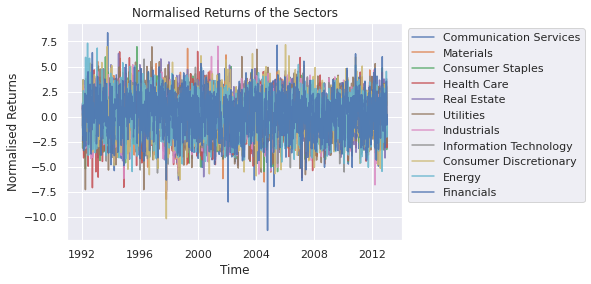

In [63]:
import seaborn as sns
sns.set()

for i in NormRetDF.columns:
    plt.plot(NormRetDF[i], label=i, alpha = 0.85)

plt.legend(bbox_to_anchor=(1, 1))
plt.title("Normalised Returns of the Sectors")
plt.xlabel("Time")
plt.ylabel("Normalised Returns")
plt.savefig("SectorReturns.pdf",bbox_inches='tight',dpi=300)
plt.show()

## Some Data Analysis

In [50]:
Corr = NormRetDF.corr()

for i in Corr.columns:
    print(np.mean(Corr[i]),i)

Corr

0.5350421695662978 Communication Services
0.550253742189389 Materials
0.4985642222746248 Consumer Staples
0.5328675138368373 Health Care
0.48616317218622884 Real Estate
0.40568156698953667 Utilities
0.6171506643883409 Industrials
0.5087419559289924 Information Technology
0.51340579483876 Consumer Discretionary
0.401565992509272 Energy
0.5442533803376277 Financials


,Communication Services,Materials,Consumer Staples,Health Care,Real Estate,Utilities,Industrials,Information Technology,Consumer Discretionary,Energy,Financials
Communication Services,1.000000,0.501478,0.499627,0.521170,0.398288,0.356339,0.618144,0.596477,0.479912,0.339216,0.574812
Materials,0.501478,1.000000,0.458498,0.493439,0.544337,0.338180,0.715989,0.513915,0.526084,0.467492,0.493380
Consumer Staples,0.499627,0.458498,1.000000,0.566910,0.402707,0.404499,0.547728,0.354741,0.484753,0.239879,0.524864
Health Care,0.521170,0.493439,0.566910,1.000000,0.411398,0.349545,0.598394,0.553337,0.500029,0.325519,0.541802
Real Estate,0.398288,0.544337,0.402707,0.411398,1.000000,0.353344,0.562641,0.415589,0.486076,0.303882,0.469532
Utilities,0.356339,0.338180,0.404499,0.349545,0.353344,1.000000,0.382411,0.245663,0.283174,0.333834,0.415508
Industrials,0.618144,0.715989,0.547728,0.598394,0.562641,0.382411,1.000000,0.634213,0.613369,0.441796,0.673971
Information Technology,0.596477,0.513915,0.354741,0.553337,0.415589,0.245663,0.634213,1.000000,0.466866,0.351383,0.463977
Consumer Discretionary,0.479912,0.526084,0.484753,0.500029,0.486076,0.283174,0.613369,0.466866,1.000000,0.296242,0.510959
Energy,0.339216,0.467492,0.239879,0.325519,0.303882,0.333834,0.441796,0.351383,0.296242,1.000000,0.317983
